
Dataset :

https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification/data


#Data Import

In [ ]:
from google.colab import files

files.upload()

{}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
df = pd.read_csv('cyberbullying_tweets.csv')

df.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


#Data Analysis and Preprocessing

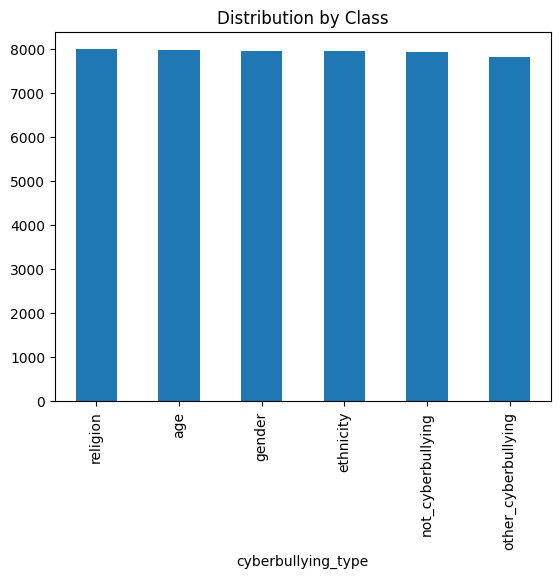

In [ ]:
ax = df['cyberbullying_type'].value_counts().plot(kind='bar')
ax.set_title("Distribution by Class")
plt.show()

# Data shows a generally balanced distribution between the classes

In [ ]:
print("Amount of row : ", df.shape[0])
print("Amount of unique row : ", len(pd.unique(df['tweet_text'])))

print('\nNull Values : ')
df.isnull().sum()

# Some duplicate data, no null data

Amount of row :  47692
Amount of unique row :  46017

Null Values : 


tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
df = df.drop_duplicates('tweet_text', keep=False, ignore_index=True)

In [ ]:
print("Amount of row (Post Clean) : ", df.shape[0])
print("Amount of unique row (Post Clean) : ", len(pd.unique(df['tweet_text'])))

Amount of row (Post Clean) :  44342
Amount of unique row (Post Clean) :  44342


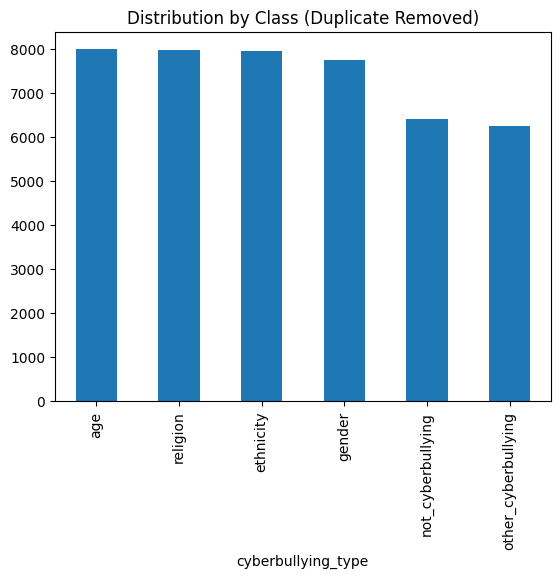

In [ ]:
ax = df['cyberbullying_type'].value_counts().plot(kind='bar')
ax.set_title("Distribution by Class (Duplicate Removed)")
plt.show()

# Removing duplicate data seems to cause minor imbalance in class distribution. Should be safe to ignore

In [ ]:
import spacy

In [ ]:
class TextCleaner:
  def __init__(self, include_stop=False, alpha_only=True, lemmatize=True):
    self.processor = spacy.load("en_core_web_sm")
    self.alpha_only = alpha_only
    self.include_stop = include_stop
    self.lemmatize = lemmatize

  def filter_token(self, token):
    if token.is_stop and not self.include_stop:
      return None

    if not token.is_alpha and self.alpha_only:
      return None

    if self.lemmatize:
      return token.lemma_.lower()

    return token.text.lower()

  def __call__(self, text):
    result = []
    tokens = self.processor(text)

    for token in tokens:
        filtered_token = self.filter_token(token)
        if filtered_token:
            result.append(filtered_token)

    if len(result) <= 0:
        result.append('<empty>')

    return ' '.join(result), len(result)

In [ ]:
def preprocess(df):
  labels = df['cyberbullying_type']
  labels = pd.get_dummies(labels)

  preprocess = TextCleaner(include_stop=True, lemmatize=True, alpha_only=True)

  docs = []
  word_count = []
  for doc in tqdm(df['tweet_text']):
    pdoc, count = preprocess(doc)
    docs.append(pdoc)
    word_count.append(count)

  result = labels
  result['label'] = df['cyberbullying_type']
  result['prep_content'] = docs
  result['word_count'] = word_count
  result['content'] = df['tweet_text']
  return result

data = preprocess(df)
data

# Preprocess each data and encode it

100%|██████████| 44342/44342 [07:00<00:00, 105.36it/s]


,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion,label,prep_content,word_count,content
0,False,False,False,True,False,False,not_cyberbullying,in other word katandandre your food be crapili...,9,"In other words #katandandre, your food was cra..."
1,False,False,False,True,False,False,not_cyberbullying,why be aussietv so white mkr theblock imaceleb...,13,Why is #aussietv so white? #MKR #theblock #ImA...
2,False,False,False,True,False,False,not_cyberbullying,a classy whore or more red velvet cupcake,8,@XochitlSuckkks a classy whore? Or more red ve...
3,False,False,False,True,False,False,not_cyberbullying,this be an isis account pretend to be a kurdis...,17,@RudhoeEnglish This is an ISIS account pretend...
4,False,False,False,True,False,False,not_cyberbullying,yes the test of god be that good or bad or ind...,21,"@Raja5aab @Quickieleaks Yes, the test of god i..."
...,...,...,...,...,...,...,...,...,...,...
44337,False,True,False,False,False,False,ethnicity,black ppl be expect to do anything depend on f...,42,"Black ppl aren't expected to do anything, depe..."
44338,False,True,False,False,False,False,ethnicity,turner do not withhold his disappointment turn...,45,Turner did not withhold his disappointment. Tu...
44339,False,True,False,False,False,False,ethnicity,i swear to god this dumb nigger bitch i have g...,19,I swear to God. This dumb nigger bitch. I have...
44340,False,True,False,False,False,False,ethnicity,yea fuck you rt if youre a nigger fucking unfo...,14,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


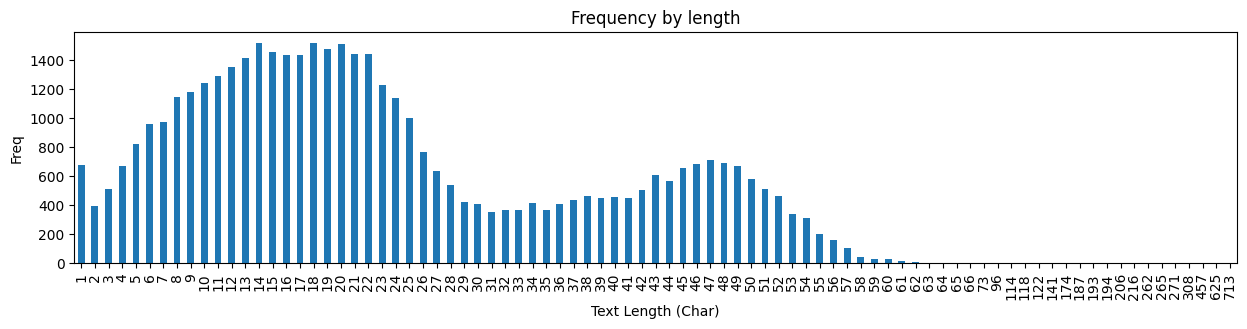

In [ ]:
ax = data['word_count'].value_counts().sort_index().plot(kind='bar', figsize=(15,3))
ax.set_title('Frequency by length')
ax.set_xlabel('Text Length (Char)')
ax.set_ylabel('Freq')
plt.show()

# Some data have outlier length (too long)

In [ ]:
# Remove data that are too short (minimal info) or too long (outlier)

data = data[(data['word_count'] >= 3) & (data['word_count'] <= 57)]

In [ ]:
# Remove data with other_cyberbullying label (potentially ambiguous)

data = data[data["label"] != "other_cyberbullying"]
data.drop('other_cyberbullying', axis=1)

,age,ethnicity,gender,not_cyberbullying,religion,label,prep_content,word_count,content
0,False,False,False,True,False,not_cyberbullying,in other word katandandre your food be crapili...,9,"In other words #katandandre, your food was cra..."
1,False,False,False,True,False,not_cyberbullying,why be aussietv so white mkr theblock imaceleb...,13,Why is #aussietv so white? #MKR #theblock #ImA...
2,False,False,False,True,False,not_cyberbullying,a classy whore or more red velvet cupcake,8,@XochitlSuckkks a classy whore? Or more red ve...
3,False,False,False,True,False,not_cyberbullying,this be an isis account pretend to be a kurdis...,17,@RudhoeEnglish This is an ISIS account pretend...
4,False,False,False,True,False,not_cyberbullying,yes the test of god be that good or bad or ind...,21,"@Raja5aab @Quickieleaks Yes, the test of god i..."
...,...,...,...,...,...,...,...,...,...
44337,False,True,False,False,False,ethnicity,black ppl be expect to do anything depend on f...,42,"Black ppl aren't expected to do anything, depe..."
44338,False,True,False,False,False,ethnicity,turner do not withhold his disappointment turn...,45,Turner did not withhold his disappointment. Tu...
44339,False,True,False,False,False,ethnicity,i swear to god this dumb nigger bitch i have g...,19,I swear to God. This dumb nigger bitch. I have...
44340,False,True,False,False,False,ethnicity,yea fuck you rt if youre a nigger fucking unfo...,14,Yea fuck you RT @therealexel: IF YOURE A NIGGE...


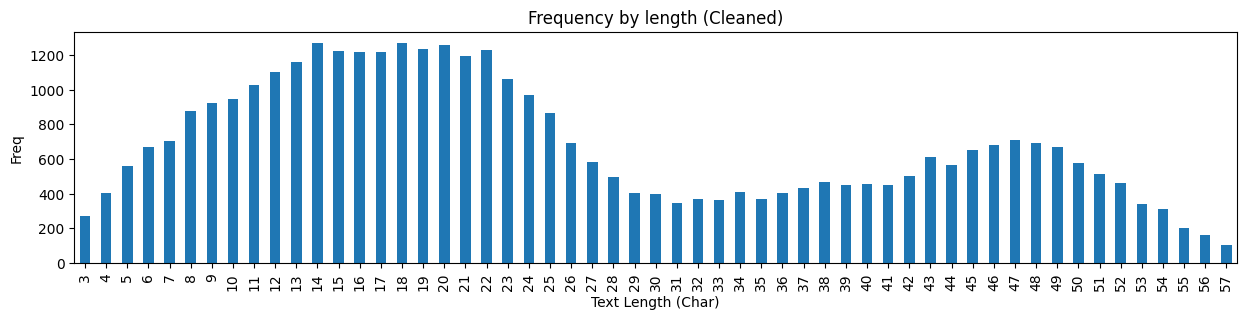

In [ ]:
ax = data['word_count'].value_counts().sort_index().plot(kind='bar', figsize=(15,3))
ax.set_title('Frequency by length (Cleaned)')
ax.set_xlabel('Text Length (Char)')
ax.set_ylabel('Freq')
plt.show()

# Good data distribution with 2 peak

In [ ]:
text = data['prep_content'].to_numpy()
label = data[['age', 'ethnicity', 'gender', 'religion', 'not_cyberbullying']].to_numpy()

In [ ]:
# Post train (Final data size)

print('Final data size : ', len(data))

Final data size :  37481


In [ ]:
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

#Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(text_train)

train_sequence = tokenizer.texts_to_sequences(text_train)
test_sequence = tokenizer.texts_to_sequences(text_test)

padded_train = pad_sequences(train_sequence, padding='post')
padded_test = pad_sequences(test_sequence, padding='post', maxlen=57)

vocab_size = len(tokenizer.word_index) + 2 # Accounting for OOV and padding
print(vocab_size)

28610


In [ ]:
idx = 10
print(padded_train[idx])
print(label_train[idx])

# Data check

[   24   129    29    49     3     5  1481     9    32    15   715     6
    21   929     7    14    24   777    27     7    22   190   353    55
     4    15   140    44  2529    21   585   829    55     4 12947     7
     3   104   585    29    13     2     7    26   754    77    10    88
  2428     7  1737     6   305    26   151  4249 12948]
[ True False False False False]


#Model Compilation and Training

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import Callback

import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Attention, Dense
from tensorflow.keras.regularizers import l2

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

class TargetAccuracy(Callback):
    def __init__(self, target_acc):
        super(TargetAccuracy, self).__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        current_train_acc = logs.get('accuracy')
        current_val_acc = logs.get('val_accuracy')

        if current_train_acc >= self.target_acc and current_val_acc >= self.target_acc:
            print(f"\nTarget training and validation accuracy ({self.target_acc}) reached. Stopping training.")
            self.model.stop_training = True

class AttLSTM(Model):
    def __init__(self, vocab_size, regularizer, class_num):
        super(AttLSTM, self).__init__()
        self.embedding = Embedding(vocab_size, output_dim=100, input_length=57)
        self.bilstm = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer=regularizer))
        self.attention = Attention(use_scale=True)
        self.dense1 = Dense(32, activation='swish', kernel_regularizer=regularizer)
        self.dense2 = Dense(8, activation='swish', kernel_regularizer=regularizer)
        self.output_layer = Dense(class_num, activation='softmax')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.bilstm(x)

        query = x
        value = x
        context_vector, attention_weights = self.attention([query, value], return_attention_scores=True)

        x = tf.reduce_mean(context_vector, axis=1)

        x = self.dense1(x)
        x = self.dense2(x)
        return self.output_layer(x)

target_accuracy = TargetAccuracy(.90)

In [ ]:
regularizer = l2(0.01)

model = AttLSTM(vocab_size, regularizer, 5)

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay=2e-6),
    metrics=['accuracy'])

In [ ]:
num_epochs = 15
history = model.fit(
    padded_train,
    label_train,
    validation_data=(padded_test, label_test),
    callbacks=[early_stopping],
    batch_size=32,
    epochs=num_epochs)

Epoch 1/15
937/937 [==============================] - 45s 40ms/step - loss: 1.2433 - accuracy: 0.5274 - val_loss: 0.9102 - val_accuracy: 0.5882
Epoch 2/15
937/937 [==============================] - 15s 16ms/step - loss: 0.8119 - accuracy: 0.6403 - val_loss: 0.9319 - val_accuracy: 0.5960
Epoch 3/15
937/937 [==============================] - 13s 14ms/step - loss: 0.5968 - accuracy: 0.8182 - val_loss: 0.4956 - val_accuracy: 0.8929
Epoch 4/15
937/937 [==============================] - 13s 14ms/step - loss: 0.4237 - accuracy: 0.9182 - val_loss: 0.4161 - val_accuracy: 0.9137
Epoch 5/15
937/937 [==============================] - 14s 14ms/step - loss: 0.3234 - accuracy: 0.9396 - val_loss: 0.4033 - val_accuracy: 0.9117
Epoch 6/15
937/937 [==============================] - 11s 12ms/step - loss: 0.2726 - accuracy: 0.9542 - val_loss: 0.5248 - val_accuracy: 0.8966
Epoch 7/15
937/937 [==============================] - 11s 12ms/step - loss: 0.2922 - accuracy: 0.9516 - val_loss: 0.3806 - val_accuracy:

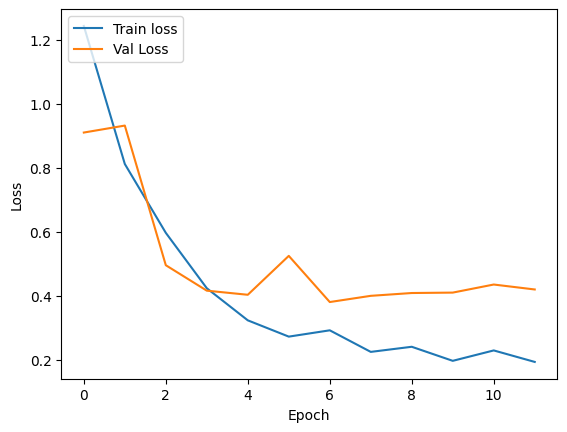

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val Loss'], loc='upper left')
plt.show()

# Graph showed minor sign of overfitting

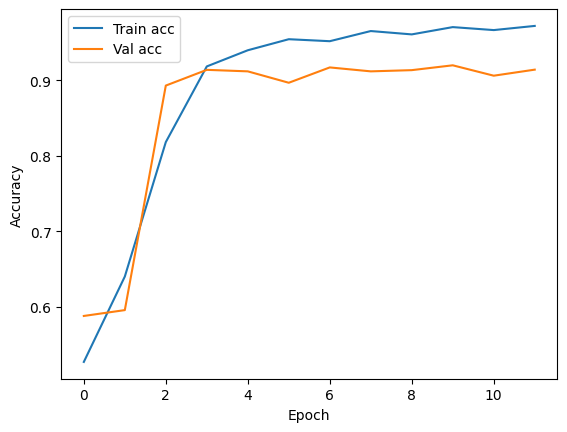

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train acc', 'Val acc'], loc='upper left')
plt.show()

# Graph showed sign of accuracy convergence and good generalization performance

In [ ]:
model.save('./trained-AttLSTM.keras')

In [ ]:
preds_raw = model.predict(padded_test)

235/235 [==============================] - 1s 4ms/step


In [ ]:
preds = [np.argmax(preds_raw[i]) for i in range(len(preds_raw))]

label = [np.argmax(label_test[i]) for i in range(len(preds_raw))]

In [ ]:
len(label)

7497

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(label, preds))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1569
           1       0.96      0.98      0.97      1531
           2       0.86      0.92      0.89      1527
           3       0.95      0.93      0.94      1621
           4       0.80      0.76      0.78      1249

    accuracy                           0.91      7497
   macro avg       0.91      0.91      0.91      7497
weighted avg       0.91      0.91      0.91      7497



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

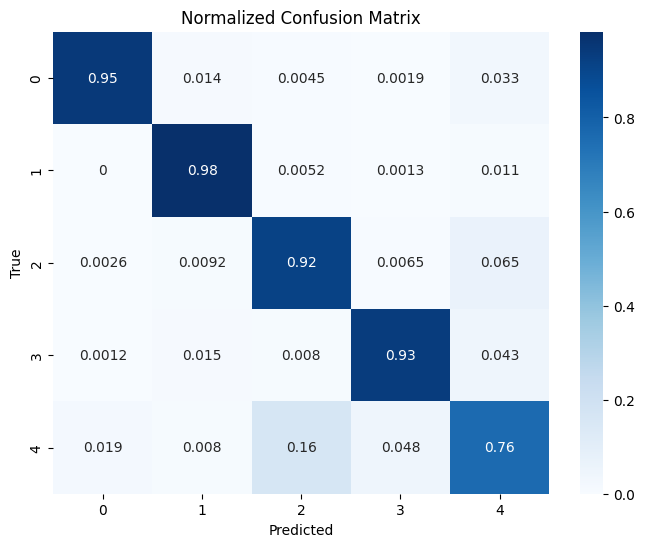

In [ ]:
cm = confusion_matrix(label, preds)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", xticklabels=np.unique(label), yticklabels=np.unique(label))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# data[['age', 'ethnicity', 'gender', 'religion', 'not_cyberbullying']].to_numpy()